# Explore here

In [ ]:
#Imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [46]:
# STEP 0) Build DataFrame with raw data
df_raw=pd.read_csv("/workspaces/exploratory-data-analysis-project/data/raw/internal-link.csv")
df_raw.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [47]:
# STEP 1.1) Get shape from DataFrame
df_raw.shape


(48895, 16)

In [48]:
# STEP 1.2) Get info (data-type and non-null values) from DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- There are a total of 48,895 rows and columns.
- Columns 1 and 3 (name and host_name) are missing some data; that is, they will have some non-null values. There are 10 columns with numeric data and 6 with categorical data.
- Columns 12 and 13 (last_review and reviews_per_month) have significantly fewer non-null values ​​than the number of rows, so many rows will contain non-null values.

In [49]:
# STEP 2) Find duplicates
num_duplicates=df_raw.duplicated().sum()
if num_duplicates == 0:
    print("Raw DataFrame does not contain duplicates")
else:
    df_raw_duplicates=df[df_raw.duplicated()] #Works as bool mask
    df_raw=df_raw.drop_duplicates()
    print("Raw DataFrame contains " + str(num_duplicates) + " duplicates")

Raw DataFrame does not contain duplicates


In [50]:
# STEP 3) Select relevant attributes
df=df_raw.drop(["id","name","host_name","last_review","reviews_per_month"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [ ]:
# STEP 4.0) Rename columns for better fitting
df=df.rename(columns={
    "neighbourhood_group": "area",
    "neighbourhood": "neigh",
    "latitude": "lat",
    "longitude": "long",
    "room_type": "type",
    "calculated_host_listings_count": "host_l_count",
    "minimum_nights": "min_nights",
    "number_of_reviews": "reviews",
    "availability_365": "available"
    }, errors="raise")

In [ ]:
# STEP 4.1) Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   host_id       48895 non-null  int64  
 1   area          48895 non-null  object 
 2   neigh         48895 non-null  object 
 3   lat           48895 non-null  float64
 4   long          48895 non-null  float64
 5   type          48895 non-null  object 
 6   price         48895 non-null  int64  
 7   min_nights    48895 non-null  int64  
 8   reviews       48895 non-null  int64  
 9   host_l_count  48895 non-null  int64  
 10  available     48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [ ]:
# STEP 4.2) Attributes counts
for i in df.columns:
    print("Number of diff. " + i + ": " + str(len(df[i].value_counts())))
for i in df.columns:
    if len(df[i].value_counts())<=10:
        print("\n-------")
        print(df[i].value_counts())

Number of diff. host_id: 37457
Number of diff. area: 5
Number of diff. neigh: 221
Number of diff. lat: 19048
Number of diff. long: 14718
Number of diff. type: 3
Number of diff. price: 674
Number of diff. min_nights: 109
Number of diff. reviews: 394
Number of diff. host_l_count: 47
Number of diff. available: 366

-------
area
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

-------
type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


In [54]:
# STEP 4.3) Automatic variable type detection based on unique ratio

# Define the ratio threshold
threshold_ratio = 0.01

# Initialize empty lists
category_var = []
numerical_var = []

# Iterate through columns
for col in df.columns:
    col_data = df[col].dropna()
    total_rows = len(df)

    if total_rows == 0:
        continue  # skip empty columns

    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows

    col_dtype = str(df[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var.append(col)
        continue

    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= threshold_ratio:
            category_var.append(col)
        else:
            numerical_var.append(col)
        continue

    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= threshold_ratio:
            category_var.append(col)
        else:
            numerical_var.append(col)
        continue

# Print results
print("Proposed categorical/discrete variables: " + str(category_var))
print("Proposed numerical/continuous variables: " + str(numerical_var))


Proposed categorical/discrete variables: ['area', 'neigh', 'type', 'min_nights', 'reviews', 'host_l_count', 'available']
Proposed numerical/continuous variables: ['host_id', 'lat', 'long', 'price']


In [55]:
# List of categorical variables
category_var = [
    "host_id",
    "area",
    "neigh",
    "type",
]

# List of numerical variables
numerical_var = [
    "lat",
    "long",
    "min_nights",
    "reviews",
    "host_l_count",
    "available"
]

# Variable to guess
y="price"

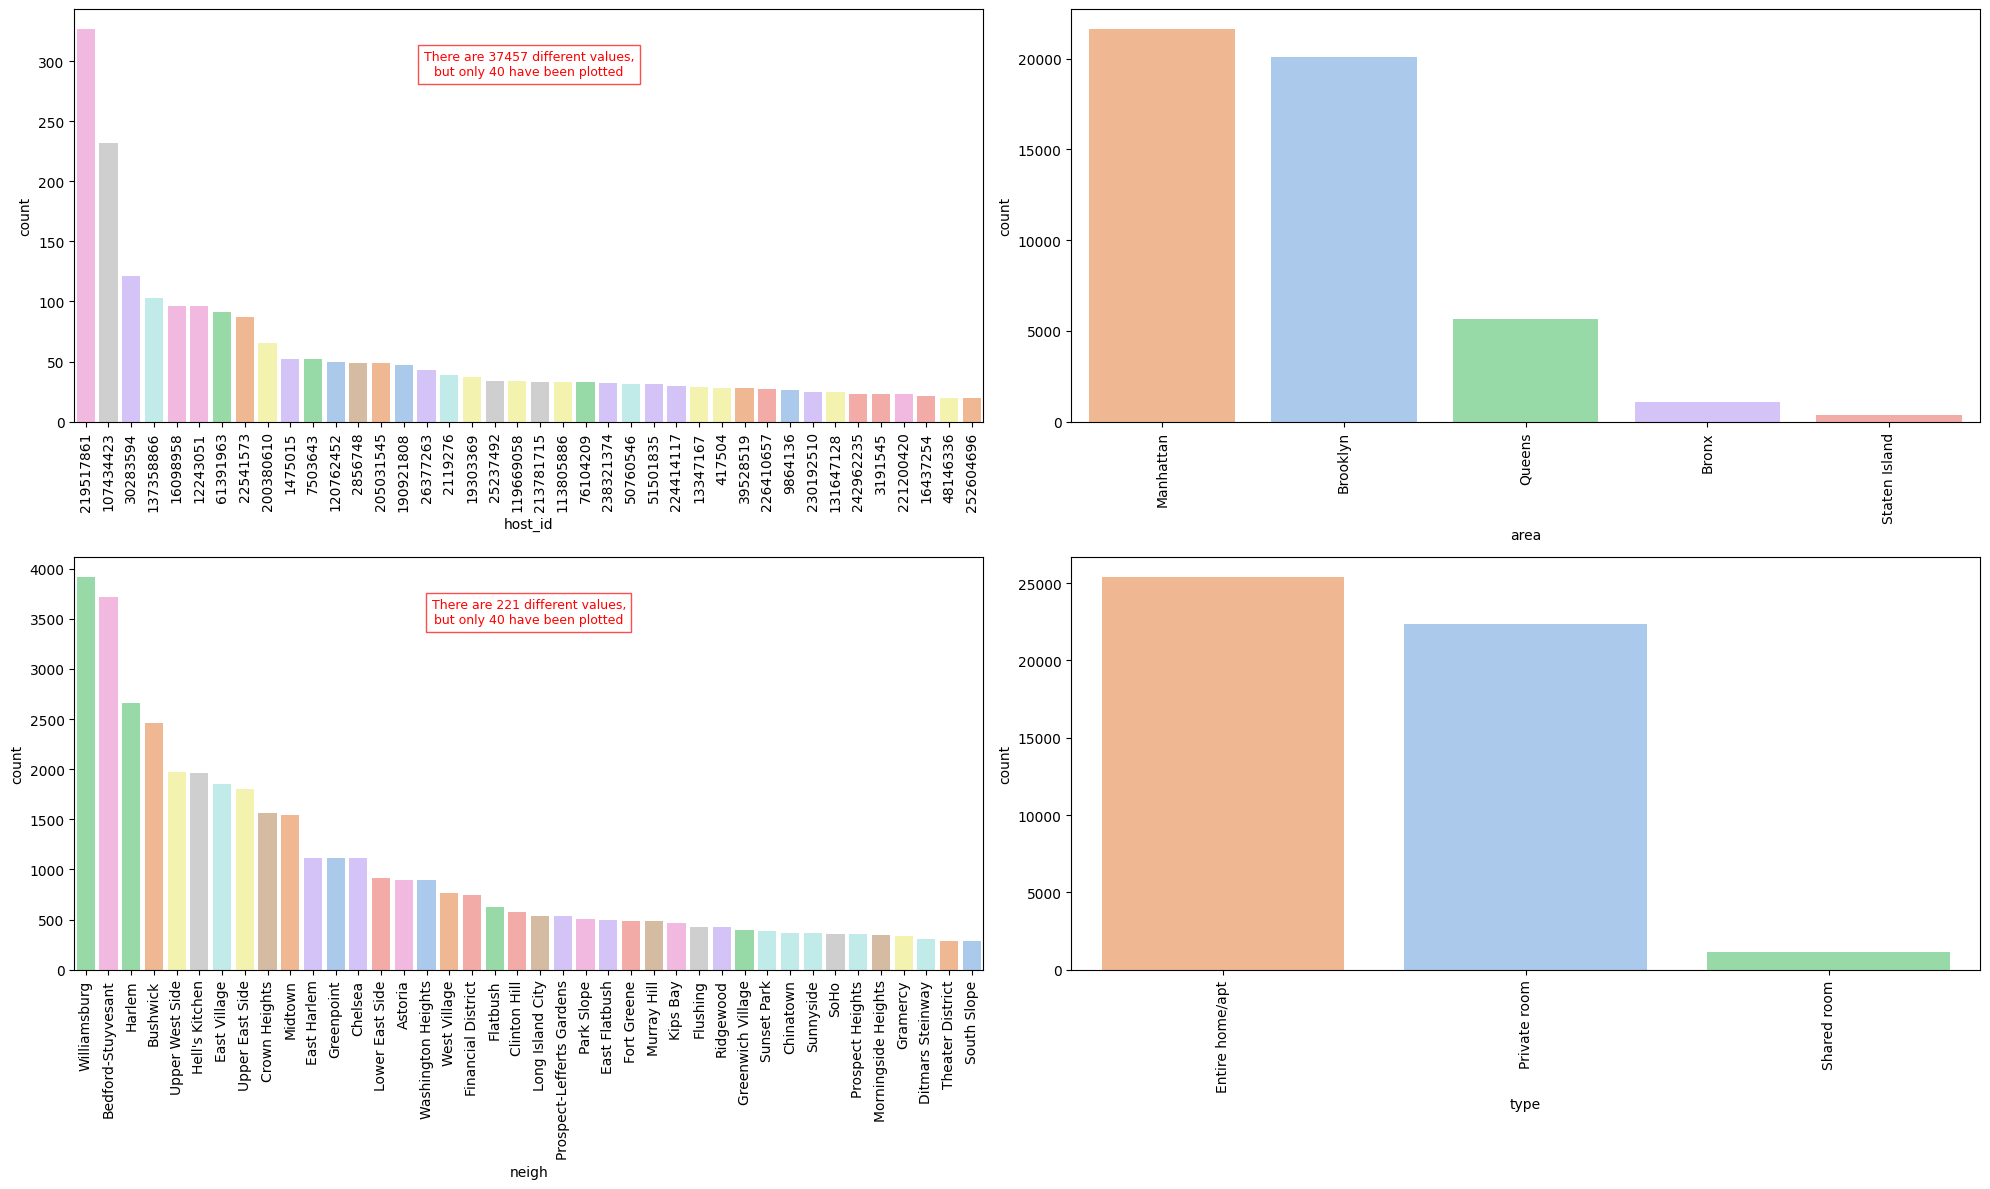

In [ ]:
# STEP 5.1) Univariable Analysis - CATEGORY Variables
# Number of different values to plot
n_diff_Values=40

# Define unit figure sizes
figHeight_unit = 6
figWidth_unit = 10

# Define number of rows and columns
n_cols = 2
n_rows = math.ceil(len(category_var) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows))
axes = axes.flatten()  # flatten the axes array for easier access

# Initialize manual counter
idx = 0

# Loop through categorical variables
for col in category_var:
    # Count unique values
    unique_count = df[col].nunique()
    
    # Limit the number of plotted categories if there are more than n_diff_Values
    if unique_count > n_diff_Values:
        order = df[col].value_counts().head(n_diff_Values).index
    else:
        order = df[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax=axes[idx],
        data=df,
        x=col,
        hue=col,
        palette='pastel',
        order=order,
        legend=False
    )
    axes[idx].tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add text box if truncated
    if unique_count > n_diff_Values:
        axes[idx].text(
            0.5, 0.9,
            f"There are {unique_count} different values,\nbut only {n_diff_Values} have been plotted",
            transform=axes[idx].transAxes,
            fontsize=9,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

- Most of advertised apartment are in Manhattan and Brooklyn.
- Most of advertised apartment are private or entire appartment.

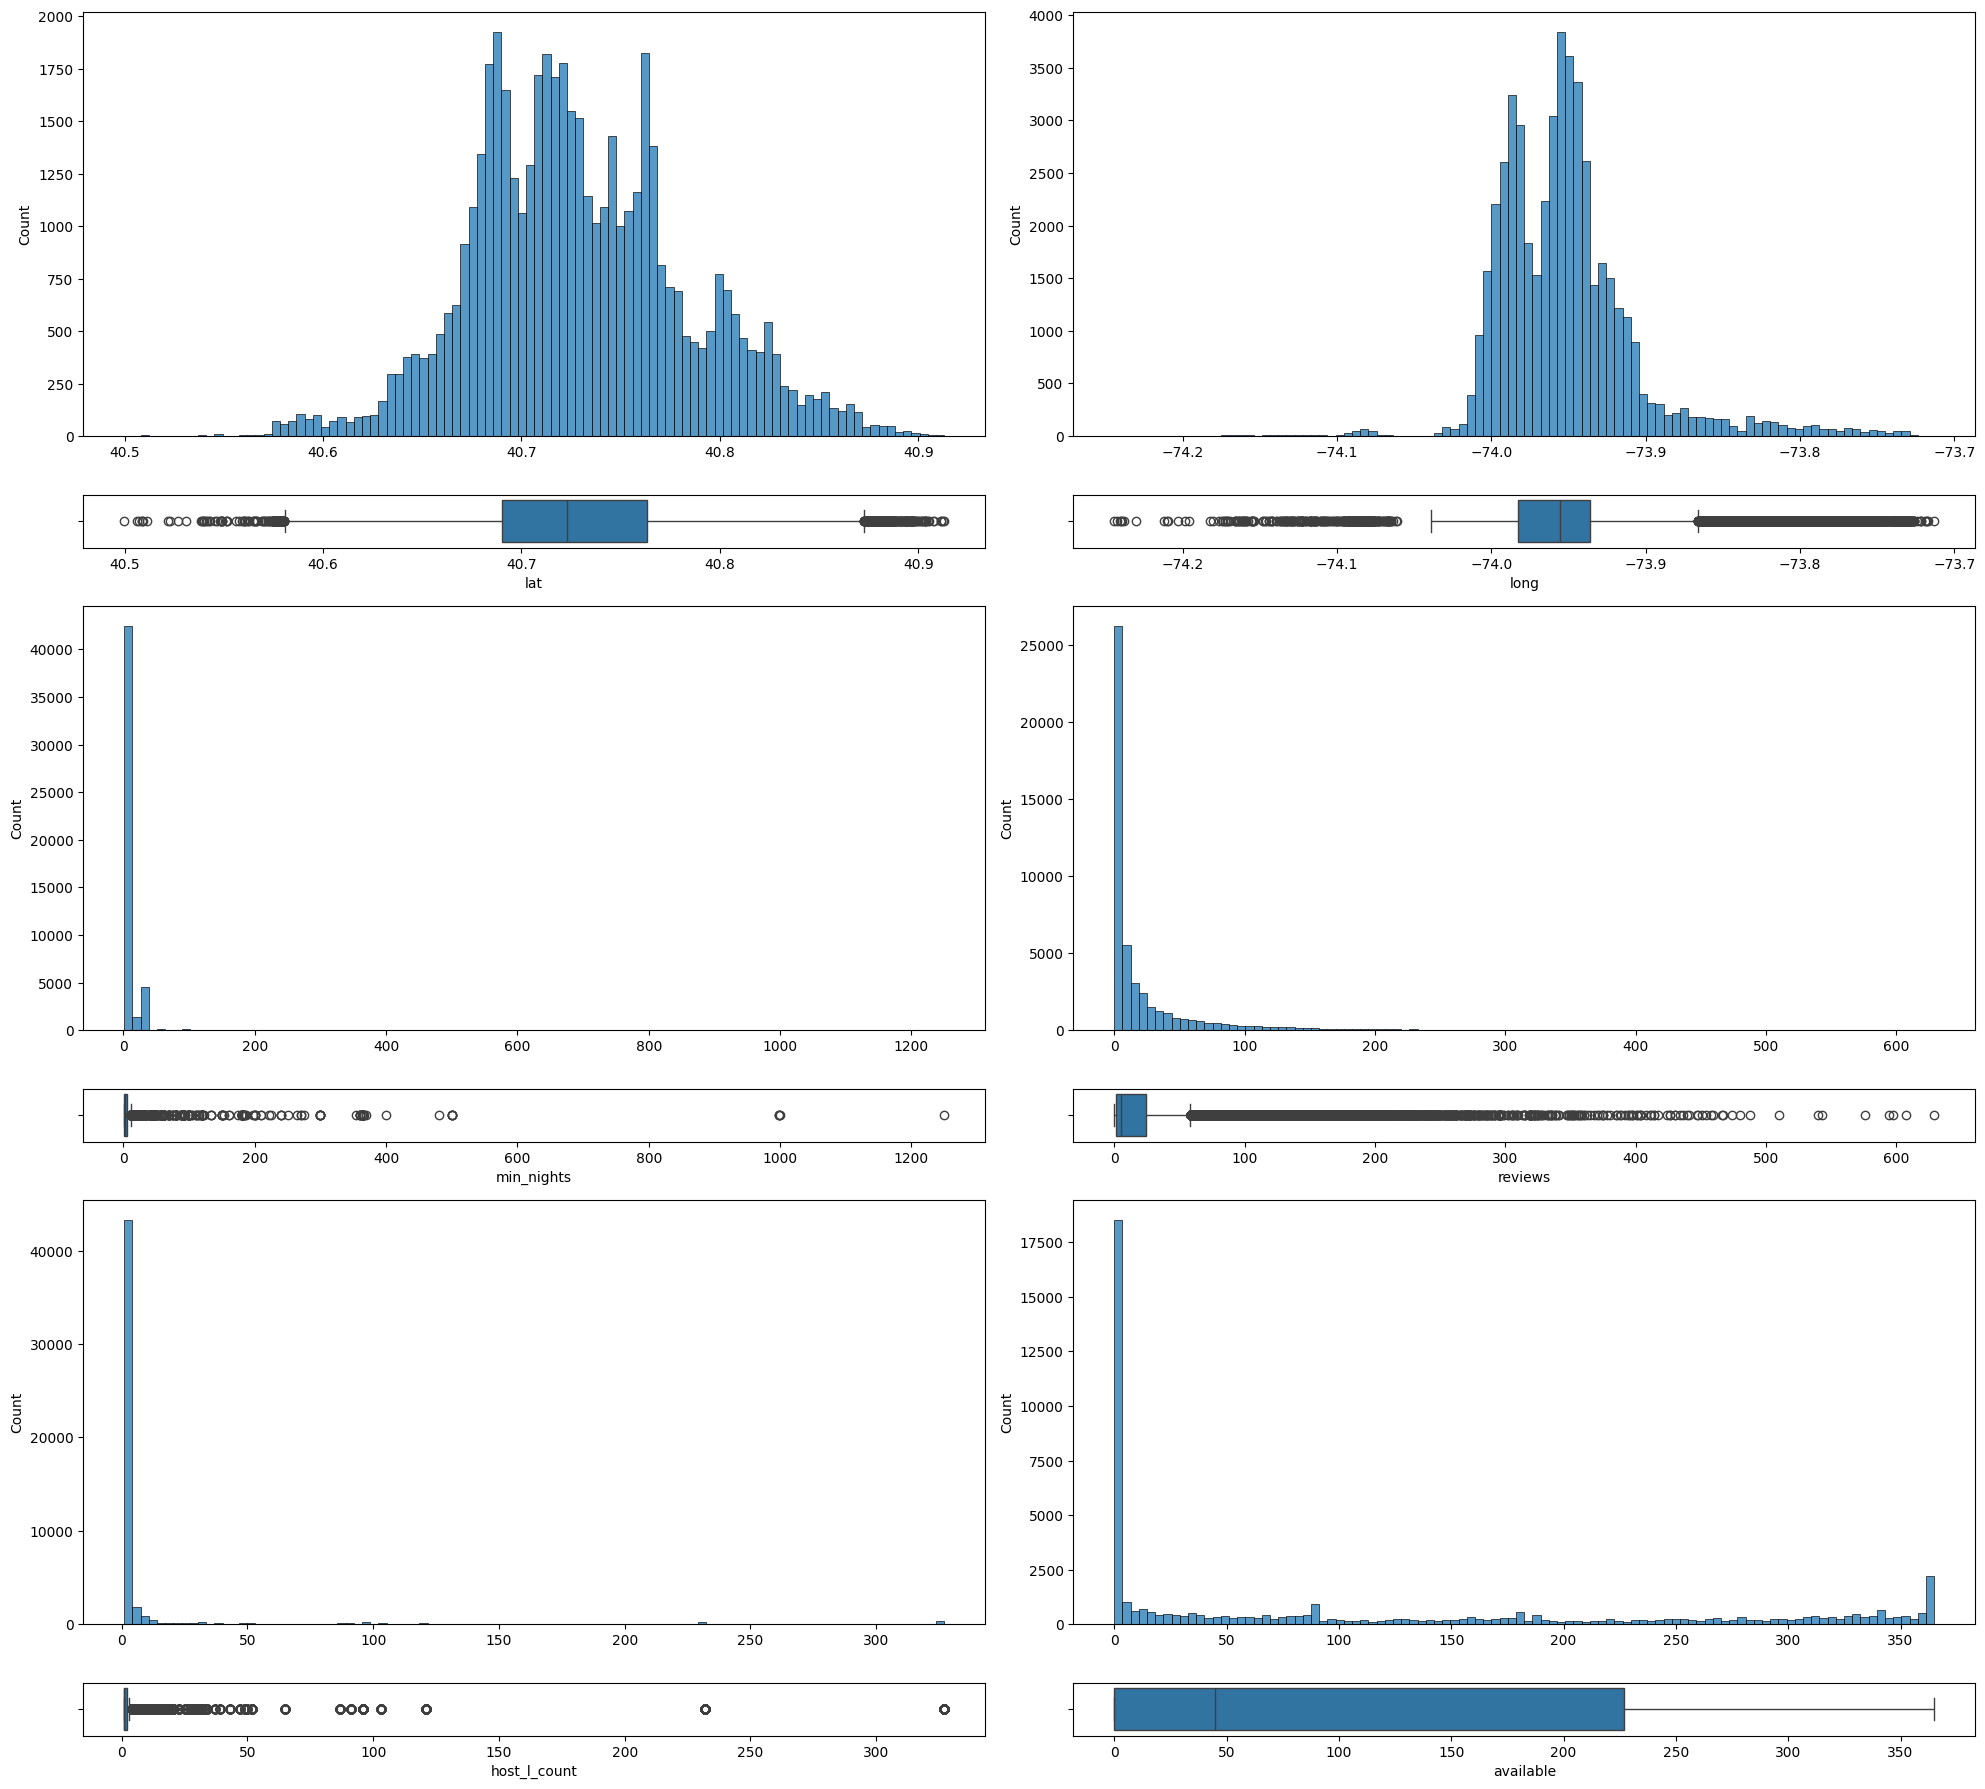

In [61]:
# STEP 5.2) Univariable Analysis - NUMERIC Variables
# Define unit figure sizes
figHeight_unit = 6
figWidth_unit = 10

#Define num of bins
bins=100

# Define number of columns and rows
n_cols = 2
n_rows = math.ceil(len(numerical_var) / n_cols)

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    n_rows * 2, n_cols,
    figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * n_rows}
)

# Loop through variables
var_idx = 0
for row in range(n_rows):
    for col in range(n_cols):
        if var_idx >= len(numerical_var):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        var = numerical_var[var_idx]

        # Histogram (top)
        sns.histplot(ax=axes[row * 2, col], data=df, x=var, bins=bins).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(ax=axes[row * 2 + 1, col], data=df, x=var)
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

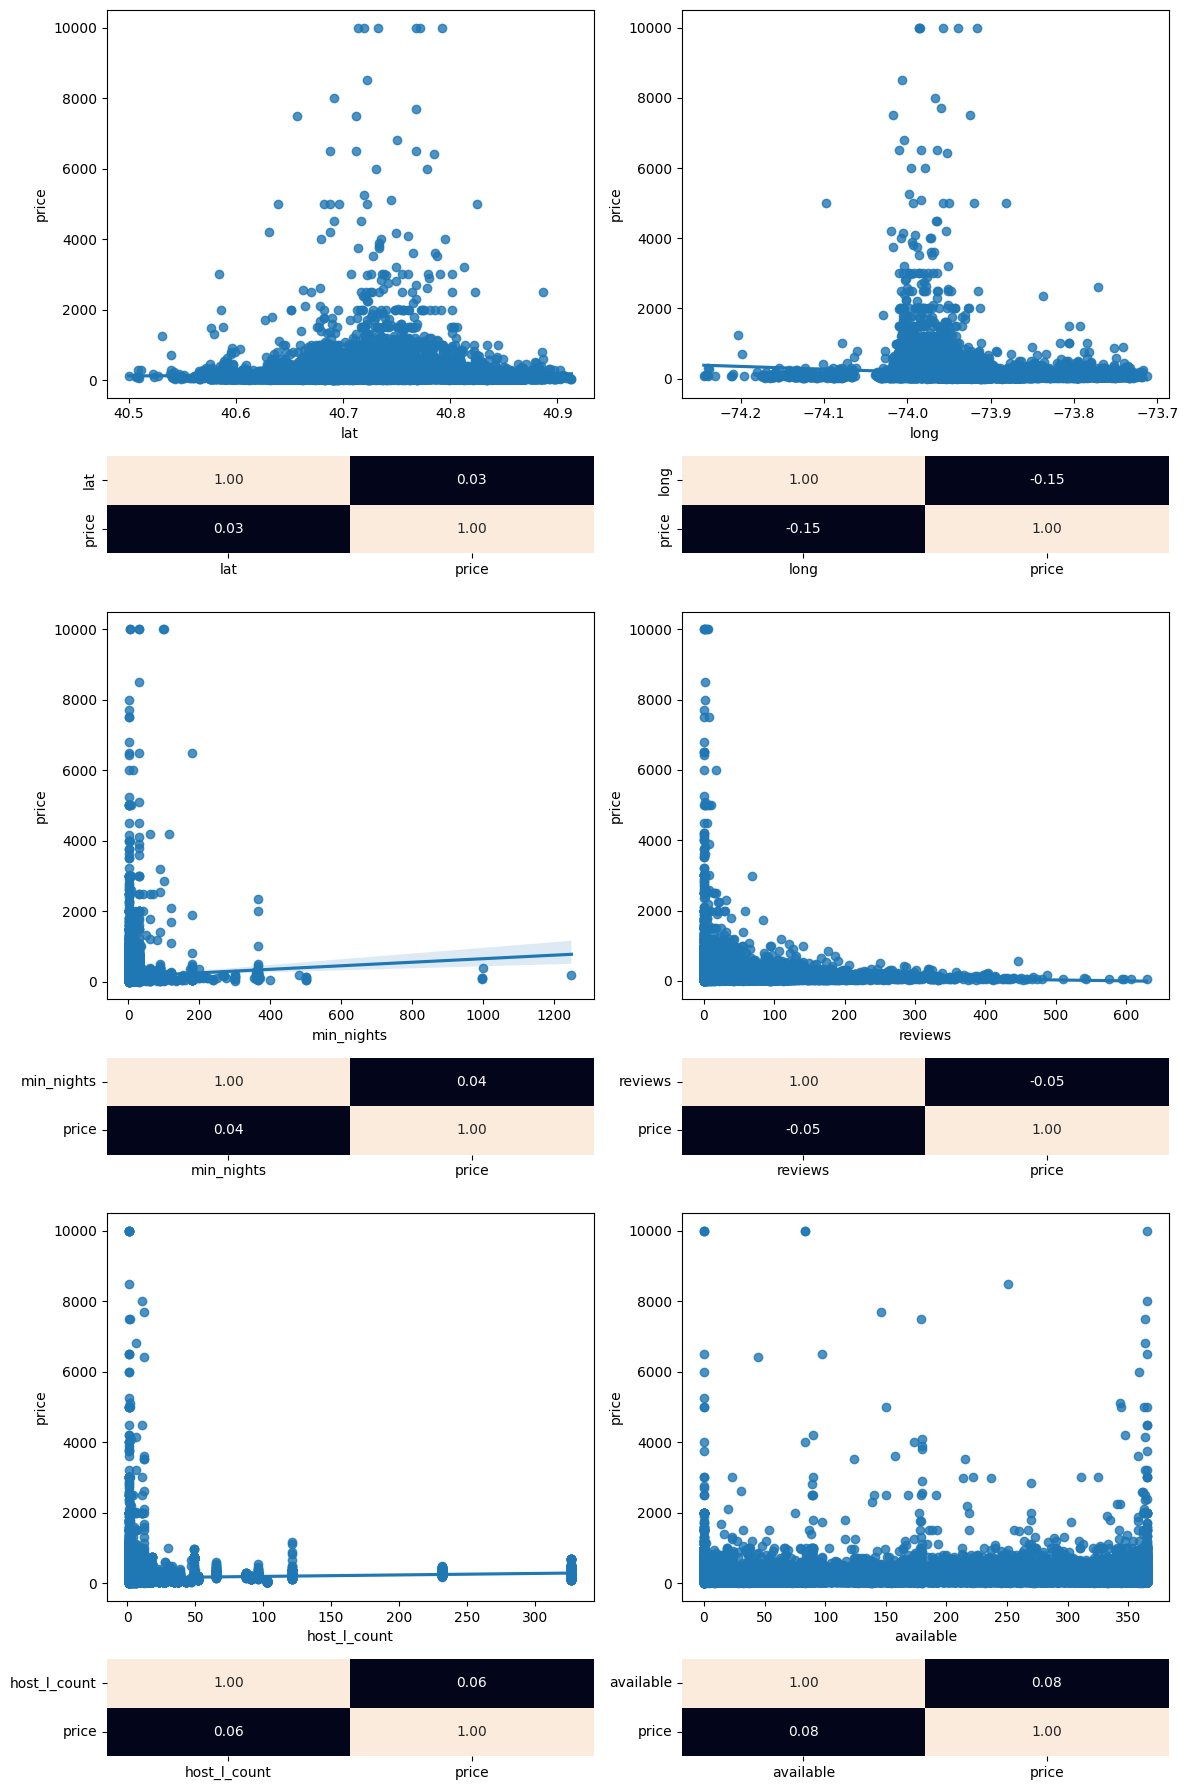

In [ ]:
# STEP 5.3) Multivariant Analysis - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)

# Define unit figure sizes
figHeight_unit = 6
figWidth_unit = 6

# Define number of columns and rows (2 variables per row)
n_cols = 2
n_rows = math.ceil(len(numerical_var) / n_cols)

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    n_rows * 2, n_cols,
    figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows),
    gridspec_kw={'height_ratios': [4, 1] * n_rows}
)

# Loop through variables
var_idx = 0
for row in range(n_rows):
    for col in range(n_cols):
        if var_idx >= len(numerical_var):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        var = numerical_var[var_idx]

        # Regplot (top)
        sns.regplot(
            ax=axes[row * 2, col],
            data=df,
            x=var,
            y=y,
            scatter_kws={'s': 10, 'alpha': 0.6},
            line_kws={'color': 'red'})

        # Boxplot (bottom)
        sns.heatmap(ax = axes[row * 2 + 1, col], data = df[[var, y]].corr(), annot = True, fmt = ".2f", cbar = False)
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# STEP 5.4) Multivariant Analysis - NUMERIC_var VS NUMERIC_target (Violin-plot)

if  df[y].nunique() > 5:
    print("Target variable " + y + " has to many different values (" + str(df[y].nunique()) + ") to draw violin graphs")
else:
    # Define unit figure sizes
    figHeight_unit = 6
    figWidth_unit = 5

    # Define number of columns and rows
    n_cols = 2
    n_rows = math.ceil(len(numerical_var) / n_cols)

    # Create subplots with custom height ratios
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows),
    )

    # Loop through variables
    var_idx = 0
    for row in range(n_rows):
        for col in range(n_cols):
            var = numerical_var[var_idx]

            # Violinplot
            sns.violinplot(ax=axes[row, col], data=df, x=y, y=var)
            var_idx += 1

    # Adjust layout
    plt.tight_layout()
    plt.show()

Target variable price has to many different values (674) to draw violin graphs


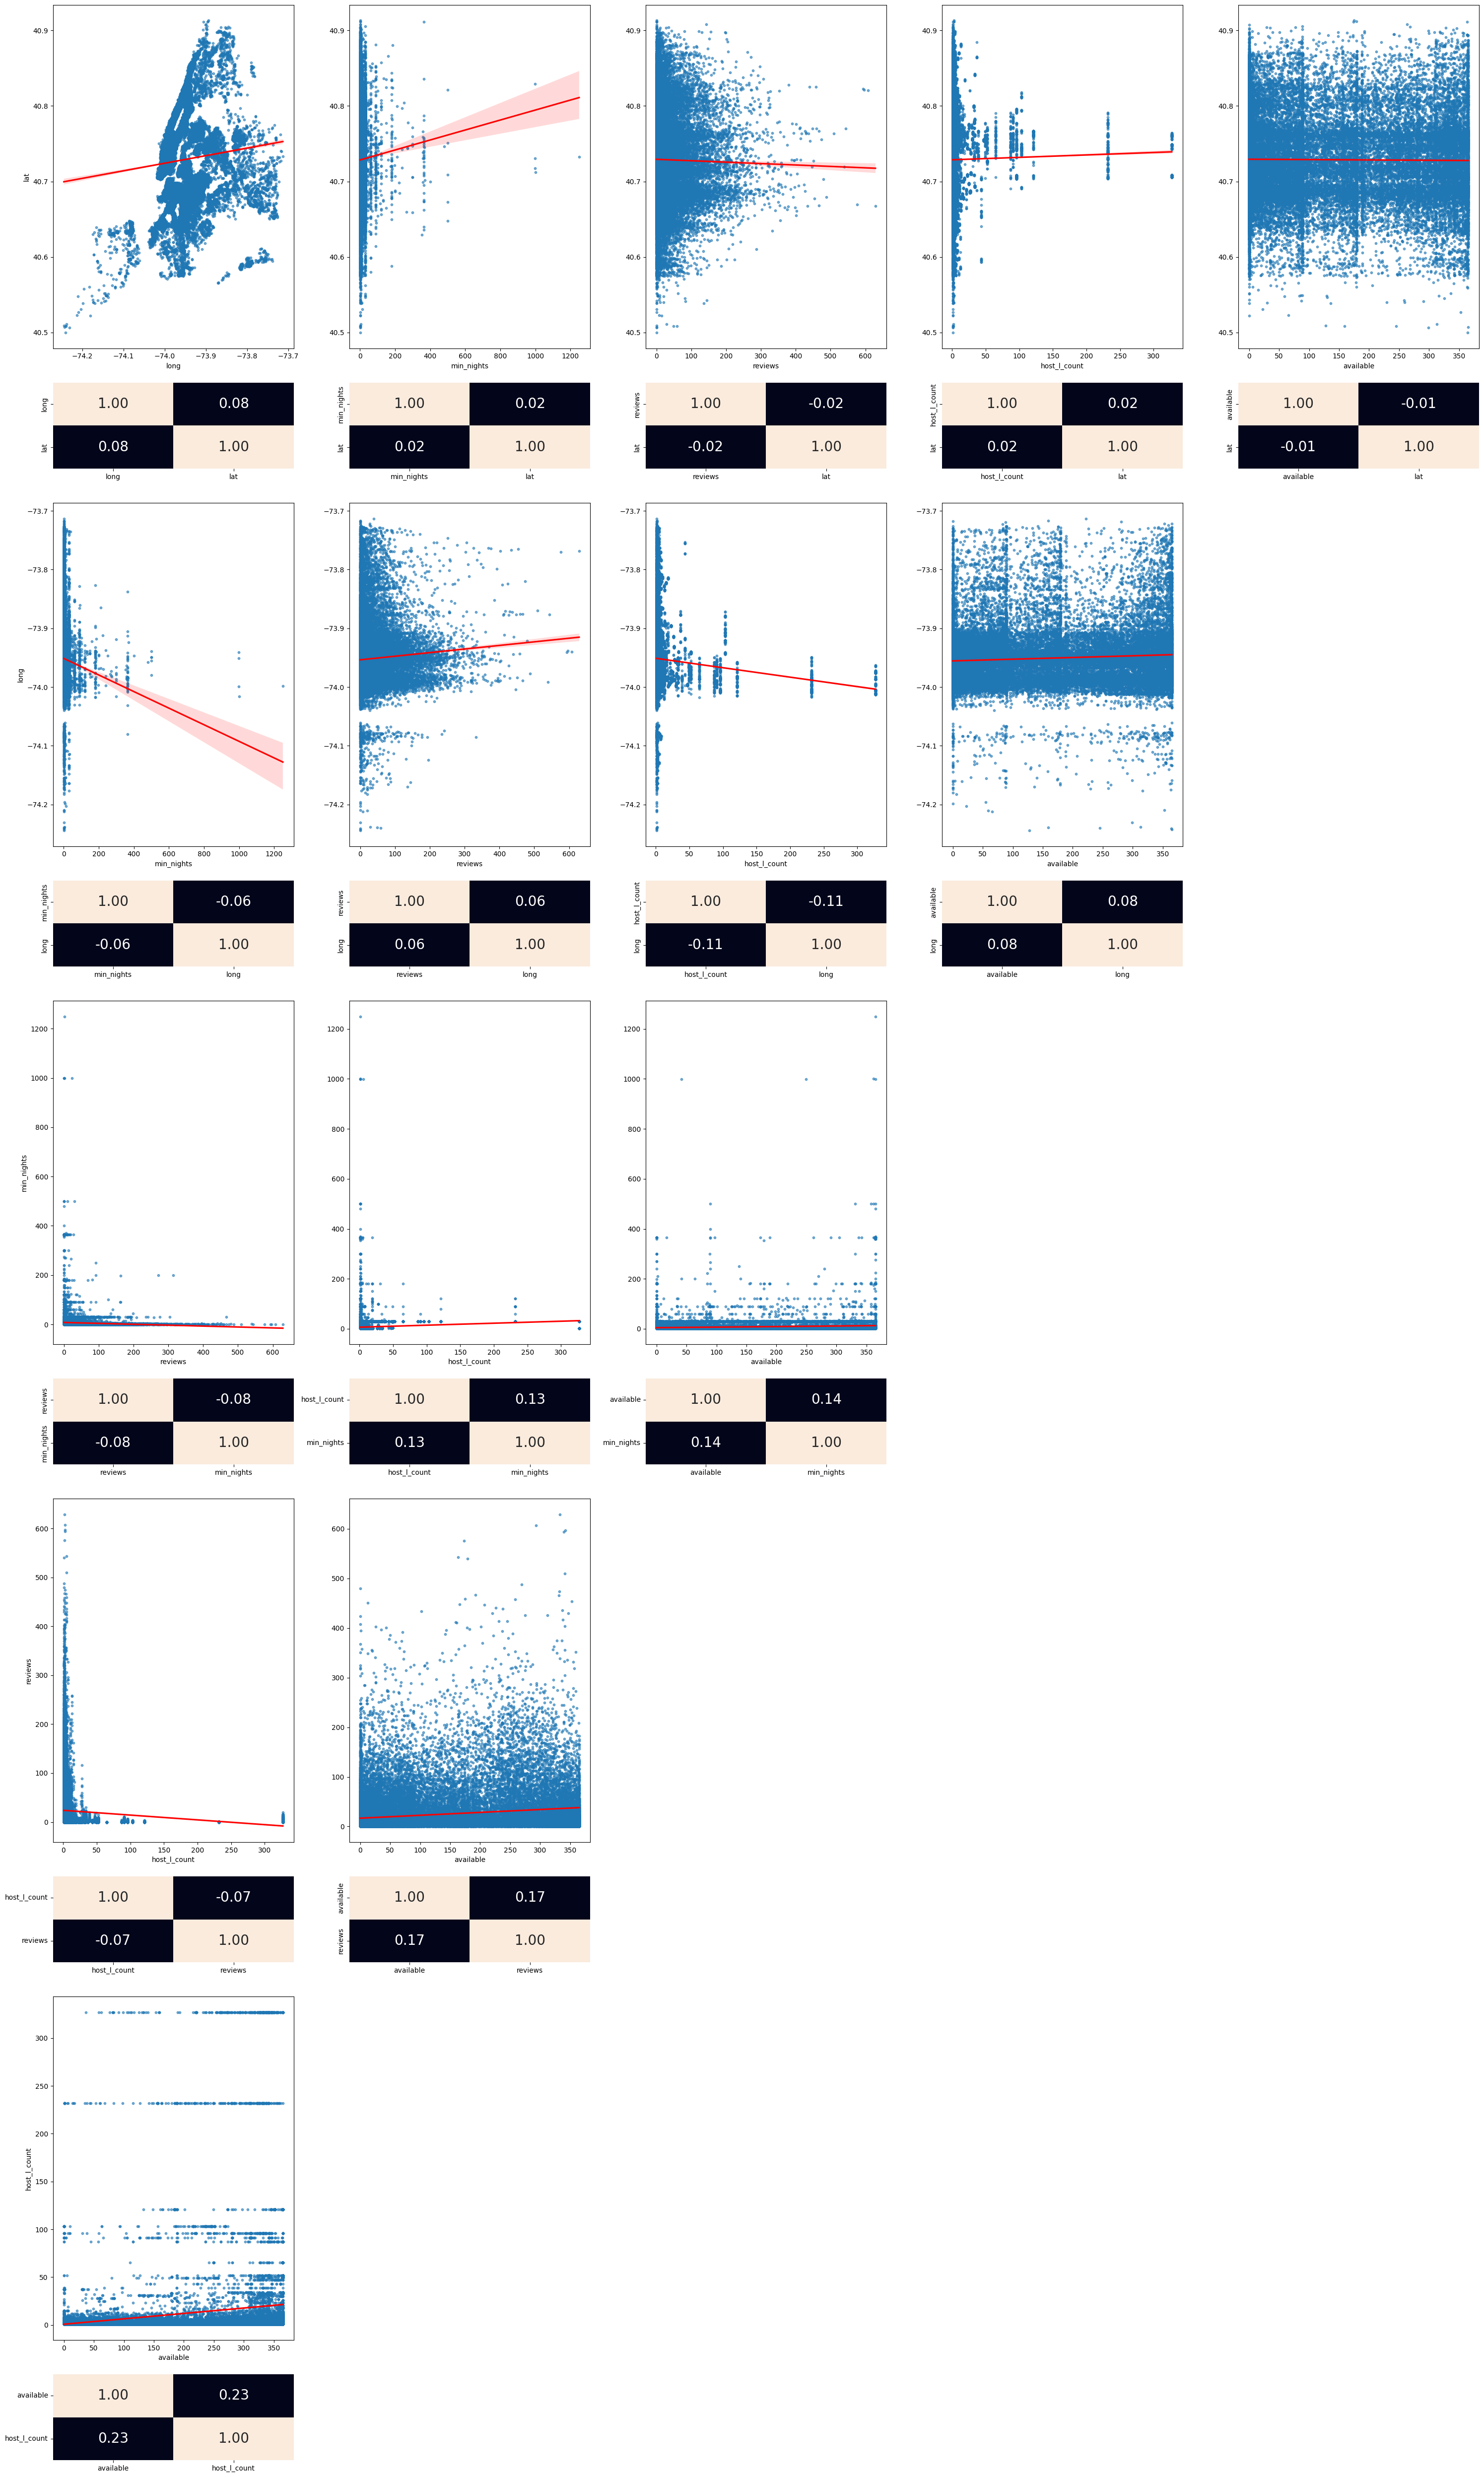

In [75]:

# STEP 5.5) Multivariant Analysis - Triangular NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)
# Each row uses a fixed Y variable and crosses it with the following X variables

# Define figure unit sizes
figHeight_unit = 10
figWidth_unit = 6

# Number of numeric variables
n_vars = len(numerical_var)

# Calculate total number of rows (one less than number of variables)
n_rows = n_vars - 1

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    n_rows * 2, n_vars - 1,
    figsize=(figWidth_unit * (n_vars - 1), figHeight_unit * n_rows),
    gridspec_kw={'height_ratios': [4, 1] * n_rows}
)

# Flatten axes for easy handling (still row × column structure)
axes = np.array(axes)

# Track subplot usage
for row in range(n_rows):
    y_var = numerical_var[row]               # fixed Y variable for this row
    n_cols = n_vars - row - 1               # decreasing number of columns each row

    for col in range(n_cols):
        x_var = numerical_var[row + col + 1]

        # Top: regplot
        sns.regplot(
            ax=axes[row * 2, col],
            data=df,
            x=x_var,
            y=y_var,
            scatter_kws={'s': 10, 'alpha': 0.6},
            line_kws={'color': 'red'}
        ).set_xlabel(x_var)
        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(y_var)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        corr_val = df[[x_var, y_var]].corr()
        sns.heatmap(
            ax=axes[row * 2 + 1, col],
            data=corr_val,
            annot=True,
            fmt=".2f",
            cbar=False,
            annot_kws={"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, n_vars - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()
